In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
samples = gen_quant.sample(data={'M':5}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = samples.draws_pd()
df

lp__  accept_stat__    lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0     0.0            0.0   66.9399      70.0      69.0      64.0      61.0   
1     0.0            0.0   90.5352      94.0      88.0      92.0      89.0   
2     0.0            0.0  147.3460     152.0     139.0     160.0     165.0   
3     0.0            0.0   12.6762      11.0      15.0       9.0      16.0   
4     0.0            0.0  142.5800     119.0     161.0     148.0     128.0   
..    ...            ...       ...       ...       ...       ...       ...   
995   0.0            0.0  186.2230     189.0     172.0     169.0     194.0   
996   0.0            0.0  135.2480     132.0     140.0     132.0     121.0   
997   0.0            0.0  129.1180     122.0     109.0     117.0     130.0   
998   0.0            0.0   10.2895       9.0      11.0      14.0       9.0   
999   0.0            0.0  164.7860     160.0     146.0     161.0     157.0   

     y_sim[5]  
0        70.0  
1        99.0  
2       170.0  
3        14.0  
4       144.0  
..        ...  
995     213.0  
996     120.0  
997     142.0  
998       9.0  
999     170.0  

[1000 rows x 8 columns]

(array([152., 142., 103., 124., 123.,  85.,  81.,  44.,  40.,  37.,  22.,
         16.,  12.,   8.,   4.,   2.,   3.,   0.,   0.,   2.]),
 array([  0.  ,  21.65,  43.3 ,  64.95,  86.6 , 108.25, 129.9 , 151.55,
        173.2 , 194.85, 216.5 , 238.15, 259.8 , 281.45, 303.1 , 324.75,
        346.4 , 368.05, 389.7 , 411.35, 433.  ]),
 <BarContainer object of 20 artists>)

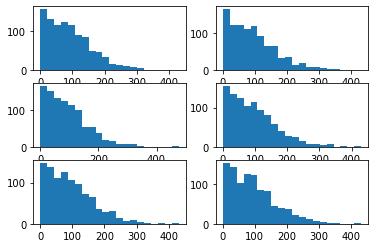

In [13]:
nobins = 20;
f,ax = plt.subplots(3,2)
ax[0][0].hist(df['lambda'], bins = nobins)
ax[0][1].hist(df['y_sim[1]'],  bins = nobins)
ax[1][0].hist(df['y_sim[2]'],  bins = nobins)
ax[1][1].hist(df['y_sim[3]'],  bins = nobins)
ax[2][0].hist(df['y_sim[4]'],  bins = nobins)
ax[2][1].hist(df['y_sim[5]'],  bins = nobins)

